___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to "***Fraud Detection Project***". This is the last project of the Capstone Series.

One of the challenges in this project is the absence of domain knowledge. So without knowing what the column names are, you will only be interested in their values. The other one is the class frequencies of the target variable are quite imbalanced.

You will implement ***Logistic Regression, Random Forest, Neural Network*** algorithms and ***SMOTE*** technique. Also visualize performances of the models using ***Seaborn, Matplotlib*** and ***Yellowbrick*** in a variety of ways.

At the end of the project, you will have the opportunity to deploy your model by ***Flask API***.

Before diving into the project, please take a look at the Determines and Tasks.

- ***NOTE:*** *This tutorial assumes that you already know the basics of coding in Python and are familiar with model deployement (flask api) as well as the theory behind Logistic Regression, Random Forest, Neural Network.*



---
---


# #Determines
The datasets contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days, where it has **492 frauds** out of **284,807** transactions. The dataset is **highly unbalanced**, the positive class (frauds) account for 0.172% of all transactions.

**Feature Information:**

**Time**: This feature is contains the seconds elapsed between each transaction and the first transaction in the dataset. 

**Amount**:  This feature is the transaction Amount, can be used for example-dependant cost-senstive learning. 

**Class**: This feature is the target variable and it takes value 1 in case of fraud and 0 otherwise.

***https://towardsdatascience.com/5-smote-techniques-for-oversampling-your-imbalance-data-b8155bdbe2b5***

***https://machinelearningmastery.com/cost-sensitive-learning-for-imbalanced-classification/***


The aim of this project is to predict whether a credit card transaction is fraudulent. Of course, this is not easy to do.
First of all, you need to analyze and recognize your data well in order to draw your roadmap and choose the correct arguments you will use. Accordingly, you can examine the frequency distributions of variables. You can observe variable correlations and want to explore multicollinearity. You can show the distribution of the target variable's classes over other variables. 
Also, it is useful to take missing values and outliers.

After these procedures, you can move on to the model building stage by doing the basic data pre-processing you are familiar with. 

Start with Logistic Regression and evaluate model performance. You will apply the SMOTE technique used to increase the sample for unbalanced data. Next, rebuild your Logistic Regression model with SMOTE applied data to observe its effect.

Then, you will use three different algorithms in the model building phase. You have applied Logistic Regression and Random Forest in your previous projects. However, the Deep Learning Neural Network algorithm will appear for the first time.

In the final step, you will deploy your model using ***Flask API***. 

**Optional**: You can Dockerize your project and deploy on cloud.

---
---


# #Tasks

#### 1. Exploratory Data Analysis & Data Cleaning

- Import Modules, Load Data & Data Review
- Exploratory Data Analysis
- Data Cleaning



    
#### 2. Data Preprocessing

- Scaling
- Train - Test Split


#### 3. Model Building

- Logistic Regression without SMOTE
- Apply SMOTE
- Logistic Regression with SMOTE
- Random Forest Classifier with SMOTE
- Neural Network

#### 4. Model Deployement

- Save and Export the Model as .pkl
- Save and Export Variables as .pkl 




---
---


## 1. Exploratory Data Analysis & Data Cleaning

### 1.1 Import Modules, Load Data & Data Review

### 1.1.1 Importing Modules

  Using cached optuna-2.10.0-py3-none-any.whl (308 kB)
  Using cached cmaes-0.8.2-py3-none-any.whl (15 kB)
  Using cached colorlog-6.6.0-py2.py3-none-any.whl (11 kB)
  Using cached cliff-3.10.0-py3-none-any.whl (80 kB)
  Using cached stevedore-3.5.0-py3-none-any.whl (49 kB)
  Using cached autopage-0.4.0-py3-none-any.whl (20 kB)
  Using cached prettytable-2.4.0-py3-none-any.whl (24 kB)
  Using cached cmd2-2.3.3-py3-none-any.whl (149 kB)
  Using cached pbr-5.8.0-py2.py3-none-any.whl (112 kB)
  Using cached pyreadline3-3.3-py3-none-any.whl (95 kB)
  Using cached pyperclip-1.8.2-py3-none-any.whl


In [3]:
## Import Libraies

# !pip install optuna

## import all main libraries automatically with pyforest
# !pip install pyforest
import pyforest

## main libraries
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.ticker as mticker

# !pip install squarify
import squarify as sq

import scipy.stats as stats
from scipy.cluster.hierarchy import linkage, dendrogram
import statsmodels.api as sm
import statsmodels.formula.api as smf
import datetime as dt
from datetime import datetime
from pyclustertend import hopkins

## pre-processing
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.dummy import DummyClassifier
from sklearn.impute import SimpleImputer, KNNImputer

## feature Selection
from sklearn.feature_selection import SelectKBest, SelectPercentile, f_classif, f_regression, mutual_info_regression

## scaling
from sklearn.preprocessing import scale 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PowerTransformer 
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler

## regression/prediction
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor

## ann
from sklearn.neural_network import MLPRegressor

## classification
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree 
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier, plot_importance

## metrics
from sklearn.metrics import plot_confusion_matrix, r2_score, mean_absolute_error, mean_squared_error
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import make_scorer, precision_score, precision_recall_curve, plot_precision_recall_curve 
from sklearn.metrics import plot_roc_curve, roc_auc_score, roc_curve, f1_score, accuracy_score, recall_score
from sklearn.metrics import silhouette_samples,silhouette_score
from sklearn.metrics.cluster import adjusted_rand_score

## model selection
from sklearn import model_selection
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold, KFold, cross_val_predict, train_test_split
from sklearn.model_selection import StratifiedKFold, GridSearchCV, cross_val_score, cross_validate

## MLearning
from sklearn.pipeline import make_pipeline, Pipeline
import optuna
from sklearn.naive_bayes import GaussianNB

## clevers
# !pip install -U pandas-profiling --user
import pandas_profiling
from pandas_profiling.report.presentation.flavours.html.templates import create_html_assets

import ipywidgets
from ipywidgets import interact
import missingno as msno 
# !pip install wordcloud
from wordcloud import WordCloud

# !pip install termcolor
import colorama
from colorama import Fore, Style  # makes strings colored
from termcolor import colored
from termcolor import cprint
# grey red green yellow blue magenta cyan white (on_grey ..)
# bold dark underline blink reverse concealed
# cprint("Have a first look to:","blue","on_grey", attrs=['bold'])

## plotly and cufflinks
import plotly 
import plotly.express as px
import cufflinks as cf
import plotly.graph_objs as go
import plotly.offline as py
from plotly.offline import iplot
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

## Ignore Warnings
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

## Figure&Display options
plt.rcParams["figure.figsize"] = (10,6)
pd.set_option('max_colwidth',200)
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 200)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [4]:
## Some Useful User-Defined-Functions

###############################################################################

def missing_values(df):
    missing_number = df.isnull().sum().sort_values(ascending=False)
    missing_percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_values = pd.concat([missing_number, missing_percent], axis=1, keys=['Missing_Number', 'Missing_Percent'])
    return missing_values[missing_values['Missing_Number']>0]

###############################################################################

def first_looking(df):
    print(colored("Shape:", 'yellow', attrs=['bold']), df.shape,'\n', 
          colored('*'*100, 'red', attrs=['bold']),
          colored("\nInfo:\n",'yellow', attrs=['bold']), sep='')
    print(df.info(), '\n', 
          colored('*'*100, 'red', attrs=['bold']), sep='')
    print(colored("Number of Uniques:\n", 'yellow', attrs=['bold']), df.nunique(),'\n',
          colored('*'*100, 'red', attrs=['bold']), sep='')
    print(colored("Missing Values:\n", 'yellow', attrs=['bold']), missing_values(df),'\n', 
          colored('*'*100, 'red', attrs=['bold']), sep='')
    print(colored("All Columns:", 'yellow', attrs=['bold']), *list(df.columns), sep='\n- ') 
    print(colored('*'*100, 'red', attrs=['bold']), sep='')

    df.columns= df.columns.str.lower().str.replace('&', '_').str.replace(' ', '_')
    
    print(colored("Columns after rename:", 'yellow', attrs=['bold']), *list(df.columns), sep='\n- ')
    print(colored('*'*100, 'red', attrs=['bold']), sep='')
    
###############################################################################
## To view summary information about the columns

def summary(column):
    print(colored("Column: ",'yellow', attrs=['bold']), column)
    print(colored('*'*100, 'red', attrs=['bold']), sep='')
    print(colored("Missing values: ", 'yellow', attrs=['bold']), df[column].isnull().sum())
    print(colored('*'*100, 'red', attrs=['bold']), sep='')
    print(colored("Missing values(%): ", 'yellow', attrs=['bold']), round(df[column].isnull().sum()/df.shape[0]*100, 2))
    print(colored('*'*100, 'red', attrs=['bold']), sep='')
    print(colored("Unique values: ", 'yellow', attrs=['bold']), df[column].nunique())
    print(colored('*'*100, 'red', attrs=['bold']), sep='')
    print(colored("Value counts: \n", 'yellow', attrs=['bold']), df[column].value_counts(dropna = False), sep='')
    print(colored('*'*100, 'red', attrs=['bold']), sep='')
    
###############################################################################
                    
def multicolinearity_control(df):                    
    df_temp = df.corr()
    count = 'Done'
    feature =[]
    collinear= []
    for col in df_temp.columns:
        for i in df_temp.index:
            if abs(df_temp[col][i] > .8 and df_temp[col][i] < 1):
                    feature.append(col)
                    collinear.append(i)
                    cprint(f"multicolinearity alert in between {col} - {i}", "red", attrs=["bold"])
    else:
        cprint(f"There is NO multicollinearity problem.", "blue", attrs=["bold"])                     
                    
###############################################################################

def duplicate_values(df):
    print(colored("Duplicate check...", 'yellow', attrs=['bold']), sep='')
    duplicate_values = df.duplicated(subset=None, keep='first').sum()
    if duplicate_values > 0:
        df.drop_duplicates(keep='first', inplace=True)
        print(duplicate_values, colored(" Duplicates were dropped!"),'\n',
              colored('*'*100, 'red', attrs=['bold']), sep='')
    else:
        print(colored("There are no duplicates"),'\n',
              colored('*'*100, 'red', attrs=['bold']), sep='')     

###############################################################################
        
def drop_columns(df, drop_columns):
    if drop_columns !=[]:
        df.drop(drop_columns, axis=1, inplace=True)
        print(drop_columns, 'were dropped')
    else:
        print(colored('Missing value control...', 'yellow', attrs=['bold']),'\n',
              colored('If there is a missing value above the limit you have given, the relevant columns are dropped and an information is given.'), sep='')

###############################################################################

def drop_null(df, limit):
    for i in df.isnull().sum().index:
        if (df.isnull().sum()[i]/df.shape[0]*100)>limit:
            print(df.isnull().sum()[i], 'percent of', i ,'were null and dropped')
            df.drop(i, axis=1, inplace=True)
    print(colored('Last shape after missing value control:', 'yellow', attrs=['bold']), df.shape, '\n', 
          colored('*'*100, 'red', attrs=['bold']), sep='')

###############################################################################

def shape_control():
    print('df.shape:', df.shape)
    print('X.shape:', X.shape)
    print('y.shape:', y.shape)
    print('X_train.shape:', X_train.shape)
    print('y_train.shape:', y_train.shape)
    print('X_test.shape:', X_test.shape)
    print('y_test.shape:', y_test.shape)

###############################################################################  

## show values in bar graphic
def show_values_on_bars(axs):
    def _show_on_single_plot(ax):        
        for p in ax.patches:
            _x = p.get_x() + p.get_width() / 2
            _y = p.get_y() + p.get_height()
            value = '{:.2f}'.format(p.get_height())
            ax.text(_x, _y, value, ha="center") 
    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)
        
###############################################################################   

### 1.1.2 Loading Dataset


In [5]:
df0 = pd.read_csv('creditcard.csv')
df = df0.copy()
df.head(3) 

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.000,-1.360,-0.073,2.536,1.378,-0.338,0.462,0.240,0.099,0.364,0.091,-0.552,-0.618,-0.991,-0.311,1.468,-0.470,0.208,0.026,0.404,0.251,-0.018,0.278,-0.110,0.067,0.129,-0.189,0.134,-0.021,149.620,0
1,0.000,1.192,0.266,0.166,0.448,0.060,-0.082,-0.079,0.085,-0.255,-0.167,1.613,1.065,0.489,-0.144,0.636,0.464,-0.115,-0.183,-0.146,-0.069,-0.226,-0.639,0.101,-0.340,0.167,0.126,-0.009,0.015,2.690,0
2,1.000,-1.358,-1.340,1.773,0.380,-0.503,1.800,0.791,0.248,-1.515,0.208,0.625,0.066,0.717,-0.166,2.346,-2.890,1.110,-0.121,-2.262,0.525,0.248,0.772,0.909,-0.689,-0.328,-0.139,-0.055,-0.060,378.660,0


### 1.1.3 Data Insights

In [6]:
first_looking(df)
duplicate_values(df)
drop_columns(df, [])
drop_null(df, 90)
# df.describe().T

Shape:(284807, 31)
****************************************************************************************************
Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 1

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
time,283726.000,94811.078,47481.048,0.000,54204.750,84692.500,139298.000,172792.000
v1,283726.000,0.006,1.948,-56.408,-0.916,0.020,1.316,2.455
v2,283726.000,-0.004,1.647,-72.716,-0.600,0.064,0.800,22.058
v3,283726.000,0.002,1.509,-48.326,-0.890,0.180,1.027,9.383
v4,283726.000,-0.003,1.414,-5.683,-0.850,-0.022,0.740,16.875
v5,283726.000,0.002,1.377,-113.743,-0.690,-0.053,0.612,34.802
v6,283726.000,-0.001,1.332,-26.161,-0.769,-0.275,0.397,73.302
v7,283726.000,0.002,1.228,-43.557,-0.553,0.041,0.570,120.589
v8,283726.000,-0.001,1.179,-73.217,-0.209,0.022,0.326,20.007
v9,283726.000,-0.002,1.095,-13.434,-0.644,-0.053,0.596,15.595


#### Feature-Target Examination

#### Target

In [9]:
target = "class"
cprint(f"Have a first look to {target}", "cyan", "on_grey", attrs=["bold"])
summary(target)

Have a first look to class
Column:  class
****************************************************************************************************
Missing values:  0
****************************************************************************************************
Missing values(%):  0.0
****************************************************************************************************
Unique values:  2
****************************************************************************************************
Value counts: 
0    283253
1       473
Name: class, dtype: int64
****************************************************************************************************


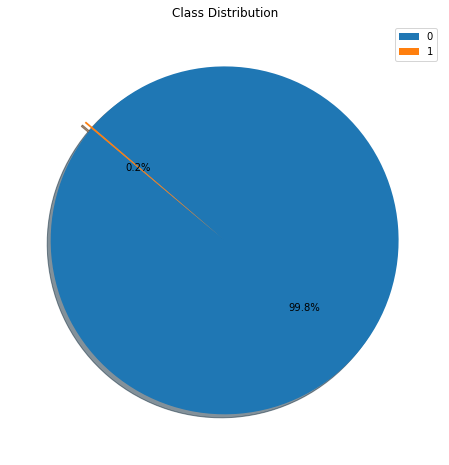

In [11]:
%matplotlib inline
plt.figure(figsize=(8, 8))

explode = [0, 0.05]
plt.pie(df[target].value_counts(), explode=explode, autopct='%1.1f%%', shadow=True, startangle=140)
plt.legend(labels=['0','1'])
plt.title('Class Distribution');
# px.pie(df, values=df[target].value_counts(), names=(df[target].value_counts()).index, title=f"Target: {target}").show();
# df[target].value_counts().iplot(kind="bar", title = f"Target: {target}")

In [ ]:
df.groupby(target).mean()

In [ ]:
cprint('Descriptive statistics according to the "class==1, Fraudulent"',"blue","on_grey", attrs=["bold"])
df[df[target] == 1].describe().T.style.background_gradient(subset = ['mean','min','50%', 'max'], cmap = 'RdPu')

In [ ]:
cprint('Descriptive statistics according to the "class==0, Reliable"',"blue","on_grey", attrs=["bold"])
df[df[target] == 0].describe().T.style.background_gradient(subset = ['mean','min','50%', 'max'], cmap = 'RdPu')

#### Features

In [ ]:
df.columns

##### 1- "time"

In [ ]:
feature_col = "time"
cprint(f"Have a first look to {feature_col}","blue","on_grey", attrs=["bold"])
summary(feature_col)

In [ ]:
# pd.crosstab(df['time'], df[target]).iplot(kind='bar', title = 'time and target')

##### 2- "amount"

In [ ]:
feature_col = "amount"
cprint(f"Have a first look to {feature_col}","blue","on_grey", attrs=["bold"])
summary(feature_col)

##### 3- all other "v" values

In [ ]:
skew_vals = df.drop("class", axis=1).skew().sort_values(ascending=False)
skew_limit = 0.75 # This is our threshold-limit to evaluate skewness. Overall below abs(1) seems acceptable for the linear models. 
skew_cols = skew_vals[abs(skew_vals)> skew_limit].sort_values(ascending=False)
skew_cols

#### Correlation

In [12]:
def color(val):
    if val > 0.8 and val < 0.99:
        color = 'red'
    elif val == 1:
        color = "white"
    else:
        color = 'black'
    return f'color: {color}'

df.corr().style.applymap(color)

,time,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,v17,v18,v19,v20,v21,v22,v23,v24,v25,v26,v27,v28,amount,class
time,1.000000,0.117927,-0.010556,-0.422054,-0.105845,0.173223,-0.063279,0.085335,-0.038203,-0.007861,0.031068,-0.248536,0.125500,-0.065958,-0.100316,-0.184392,0.011286,-0.073819,0.090305,0.029537,-0.051022,0.045913,0.143727,0.051474,-0.015954,-0.233262,-0.041818,-0.005171,-0.009305,-0.010559,-0.012359
v1,0.117927,1.000000,0.006875,-0.008112,0.002257,-0.007036,0.000413,-0.009173,-0.001168,0.001828,0.000815,0.001028,-0.001524,-0.000568,-0.002663,-0.000602,-0.003345,-0.003491,-0.003535,0.000919,-0.001393,0.002818,-0.001436,-0.001330,-0.000723,-0.000222,-0.000684,-0.015706,-0.004861,-0.230105,-0.094486
v2,-0.010556,0.006875,1.000000,0.005278,-0.001495,0.005210,-0.000594,0.007425,0.002899,-0.000274,0.000620,-0.000633,0.002266,0.000680,0.002711,0.001538,0.004013,0.003244,0.002477,-0.000358,-0.001287,-0.004897,0.001237,-0.003855,0.000701,-0.001569,0.000253,0.007555,0.001611,-0.533428,0.084624
v3,-0.422054,-0.008112,0.005278,1.000000,0.002829,-0.006879,-0.001511,-0.011721,-0.001815,-0.003579,-0.009632,0.002339,-0.005900,0.000113,-0.003027,-0.001230,-0.004430,-0.008159,-0.003495,-0.000016,-0.002269,0.003500,-0.000275,0.000449,-0.000072,0.000425,-0.000094,-0.007051,-0.000134,-0.212410,-0.182322
v4,-0.105845,0.002257,-0.001495,0.002829,1.000000,0.001744,-0.000880,0.004657,0.000890,0.002154,0.002753,-0.001223,0.003366,0.000177,0.002801,0.000572,0.003346,0.003655,0.002325,-0.000560,0.000318,-0.001034,0.000115,0.000732,-0.000120,0.000162,0.000777,0.001322,0.000231,0.099514,0.129326
v5,0.173223,-0.007036,0.005210,-0.006879,0.001744,1.000000,-0.000938,-0.008709,0.001430,-0.001213,-0.006050,0.000411,-0.002342,0.000019,-0.001000,-0.001171,-0.002373,-0.004466,-0.002685,0.000436,-0.001185,0.001622,-0.000559,0.001183,0.000198,0.000069,0.000390,-0.005798,-0.000820,-0.387685,-0.087812
v6,-0.063279,0.000413,-0.000594,-0.001511,-0.000880,-0.000938,1.000000,0.000436,0.003036,-0.000734,-0.002180,-0.000211,-0.001185,0.000397,0.000184,-0.000470,0.000122,-0.001716,0.000541,0.000106,-0.000181,-0.002134,0.001104,-0.000755,0.001202,0.000697,-0.000028,0.000289,0.000925,0.216389,-0.043915
v7,0.085335,-0.009173,0.007425,-0.011721,0.004657,-0.008709,0.000436,1.000000,-0.006419,-0.004921,-0.013617,0.002454,-0.006153,-0.000170,-0.003816,-0.001394,-0.005944,-0.008794,-0.004279,0.000846,-0.001192,0.009010,-0.002280,0.003303,-0.000384,-0.000072,0.000624,-0.004537,0.001657,0.400408,-0.172347
v8,-0.038203,-0.001168,0.002899,-0.001815,0.000890,0.001430,0.003036,-0.006419,1.000000,0.001038,0.000481,0.004688,-0.004414,-0.001381,-0.008387,0.001044,-0.004376,-0.005576,-0.001323,-0.000626,0.000271,0.018892,-0.006156,0.004994,0.000113,0.000011,-0.001407,0.000613,-0.000099,-0.104662,0.033068
v9,-0.007861,0.001828,-0.000274,-0.003579,0.002154,-0.001213,-0.000734,-0.004921,0.001038,1.000000,-0.012613,-0.000217,-0.002385,0.000745,0.001981,-0.000283,-0.000086,-0.002318,-0.000373,0.000247,-0.001838,0.000679,0.000785,0.000677,-0.000103,-0.000275,0.001253,0.008221,0.005591,-0.044123,-0.094021


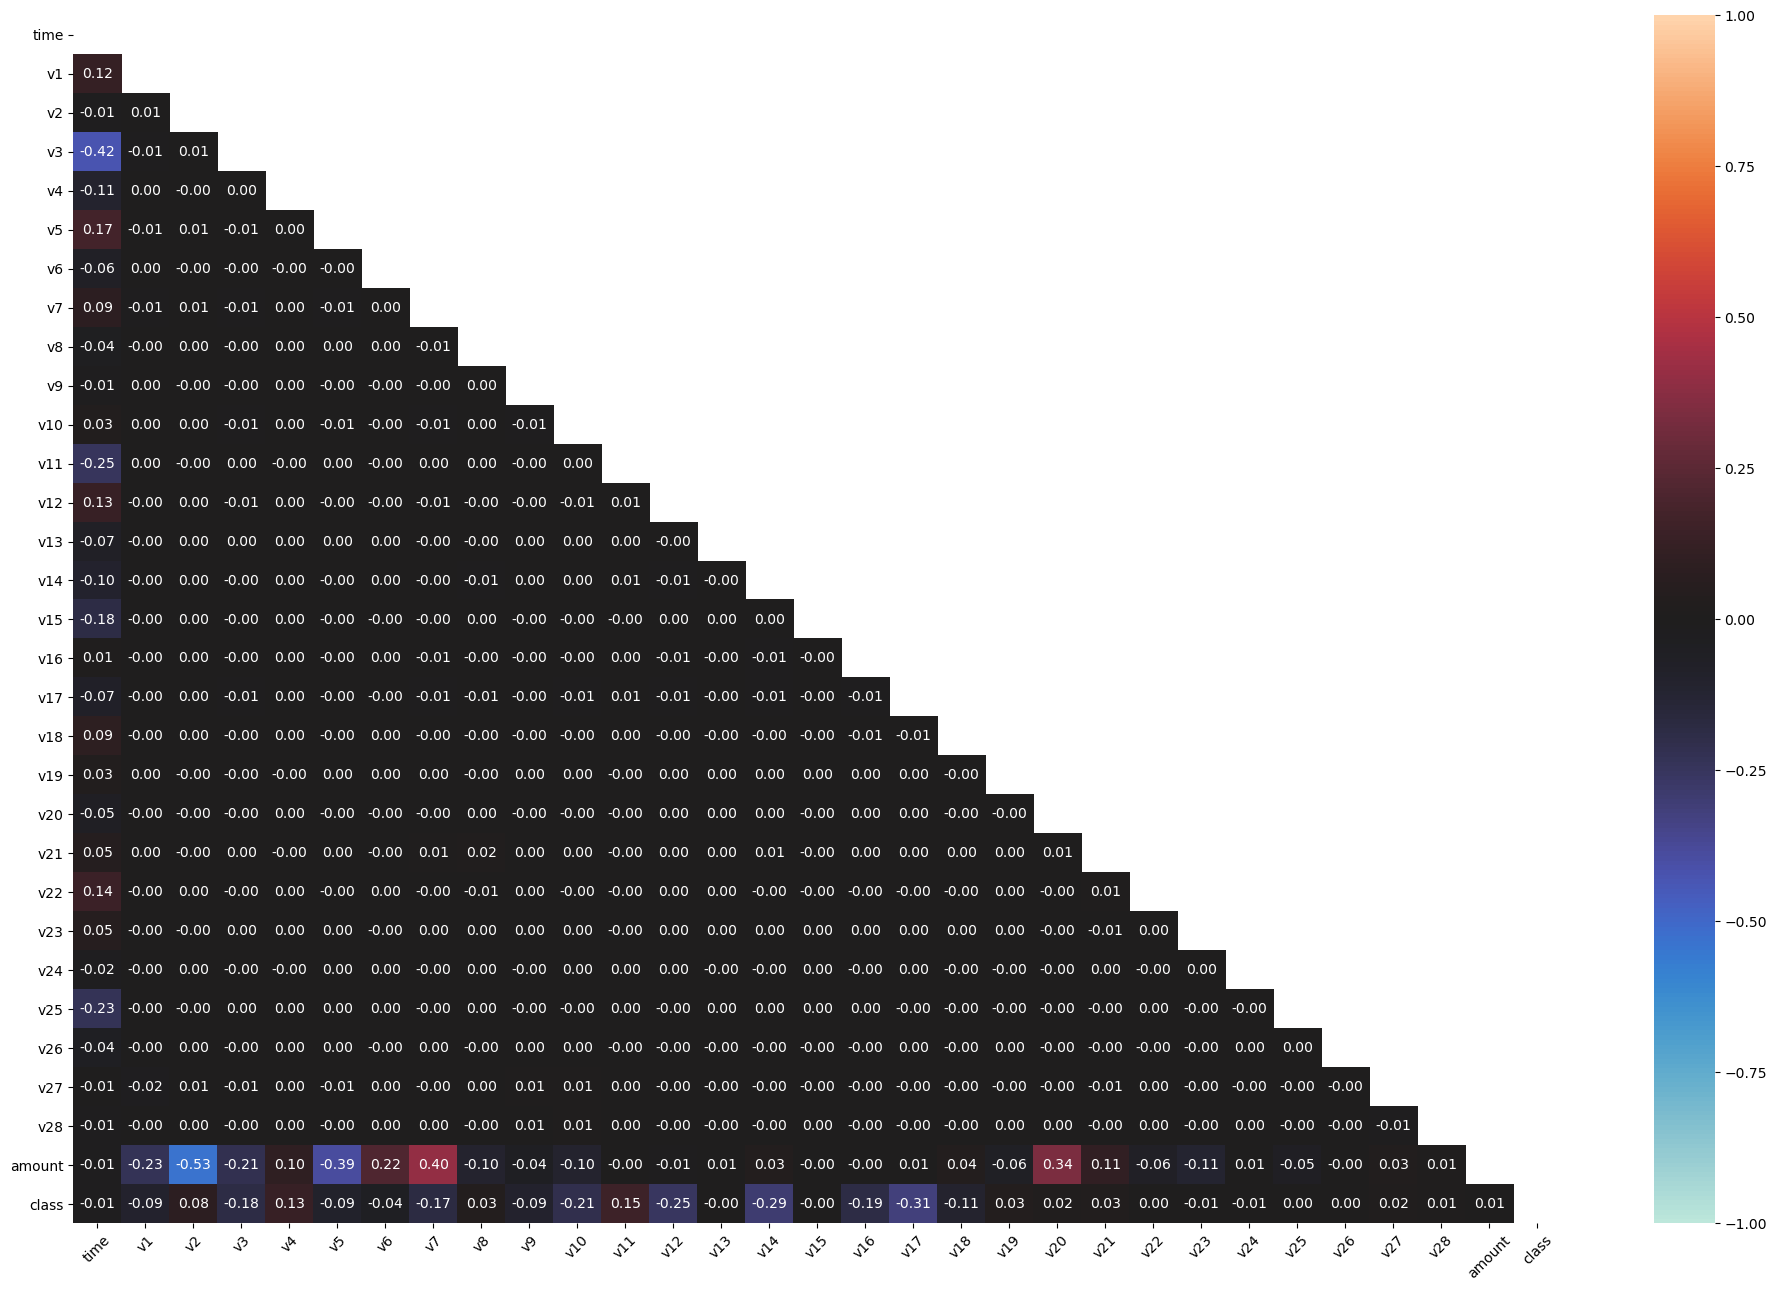

In [13]:
%matplotlib inline
matrix = np.triu(df.corr())
fig,ax = plt.subplots(figsize=(24, 16),dpi=100)
sns.heatmap (df.corr(), annot=True, ax=ax, fmt='.2f', vmin=-1, vmax=1, center=0,mask=matrix)
plt.xticks(rotation = 45);

#### Multicollinearity Control

In [14]:
multicolinearity_control(df)

There is NO multicollinearity problem.


In [ ]:
#feature==collinear

In [ ]:
# df_fetaure = pd.DataFrame({'feature':feature,'collinear':collinear})
# df_fetaure

### Exploratory Data Analysis

##### Handle with Skewness

In [19]:
df_skeweds = df.drop(target, axis=1).skew()[abs(df.skew()) > 0.8]  
# 0.8 is our threshold-limit to evaluate skewness. Overall below abs(1) seems acceptable for the linear models. 
df_skeweds

v1       -3.273
v2       -4.695
v3       -2.152
v5       -2.414
v6        1.830
v7        2.890
v8       -8.311
v10       1.253
v12      -2.199
v14      -1.919
v16      -1.051
v17      -3.690
v20      -2.043
v21       2.820
v23      -5.867
v28      11.555
amount   16.979
dtype: float64

In [21]:
for i in df_skeweds:
    if abs(0.8<i<1.4):
        cprint(f"Skewness: {round(i,2)}, moderately skewed.","yellow", attrs=["bold"]) 
    if i<-1.4 or i>1.4:
        cprint(f"Skewness: {round(i,2)}, highly skewed.","red", attrs=["bold"]) 

Skewness: -3.27, highly skewed.
Skewness: -4.7, highly skewed.
Skewness: -2.15, highly skewed.
Skewness: -2.41, highly skewed.
Skewness: 1.83, highly skewed.
Skewness: 2.89, highly skewed.
Skewness: -8.31, highly skewed.
Skewness: 1.25, moderately skewed.
Skewness: -2.2, highly skewed.
Skewness: -1.92, highly skewed.
Skewness: -3.69, highly skewed.
Skewness: -2.04, highly skewed.
Skewness: 2.82, highly skewed.
Skewness: -5.87, highly skewed.
Skewness: 11.56, highly skewed.
Skewness: 16.98, highly skewed.


##### Handling with Skewness with Log Method

In [22]:
df_log = df[df_skeweds.index]
for i in df_skeweds.index:
    df_log[i] = df_log[i].apply(np.log1p)
df_log.skew()

v1       -1.660
v2       -1.832
v3       -2.103
v5       -1.613
v6       -1.058
v7       -1.863
v8       -1.639
v10      -1.643
v12      -2.437
v14      -2.171
v16      -2.143
v17      -1.670
v20      -1.316
v21      -1.325
v23      -2.096
v28      -5.275
amount    0.161
dtype: float64

In [23]:
for i in df_log.skew():
    if abs(0.8<i<1.4):
        cprint(f"Skewness: {round(i,2)}, moderately skewed.","yellow", attrs=["bold"]) 
    if i<-1.4 or i>1.4:
        cprint(f"Skewness: {round(i,2)}, highly skewed.","red", attrs=["bold"]) 

Skewness: -1.66, highly skewed.
Skewness: -1.83, highly skewed.
Skewness: -2.1, highly skewed.
Skewness: -1.61, highly skewed.
Skewness: -1.86, highly skewed.
Skewness: -1.64, highly skewed.
Skewness: -1.64, highly skewed.
Skewness: -2.44, highly skewed.
Skewness: -2.17, highly skewed.
Skewness: -2.14, highly skewed.
Skewness: -1.67, highly skewed.
Skewness: -2.1, highly skewed.
Skewness: -5.27, highly skewed.


##### Handling with Skewness with Power Transformer Method

In [ ]:
df_trans = PowerTransformer(method='yeo-johnson').fit_transform(df[df_skeweds.index])
df_trans = pd.DataFrame(df_trans, columns=df_skeweds.index)
df_trans.skew()

In [ ]:
for i in df_trans.skew():
    if abs(0.75<i<1.4):
        cprint(f"Skewness: {round(i,2)}, moderately skewed.","yellow", attrs=["bold"]) 
    if i<-1.4 or i>1.4:
        cprint(f"Skewness: {round(i,2)}, highly skewed.","red", attrs=["bold"]) 

In [ ]:
# In this study, even if we do NOT need to use OneHotEncoder (OHE) since there is NOT any categorical variable, the following OHE codes will be put down in case they could be used for further studies.  

In [ ]:
# df_trans.head(5)

In [ ]:
# df.head(5)

In [ ]:
df_ = pd.concat([df[df.columns.difference(df_trans.columns)], df_trans], axis=1, join='inner')

In [ ]:
df_ = df_[df.columns]
df_.head()

In [ ]:
# df.head()

In [ ]:
df.shape

In [ ]:
df_trans.shape

In [ ]:
df_.shape

In [ ]:
missing_values(df)

In [ ]:
missing_values(df_trans)

### Data Cleaning
Check Missing Values and Outliers

In [ ]:
missing_values(df_)
# there are no missing values

---
---


## 2. Data Preprocessing

#### Train-Test Split|Scale|Dummy 

As in this case, for extremely imbalanced datasets you may want to make sure that classes are balanced across train and test data.

In [ ]:
# make_dtype_object = df[['categorical1','categorical2']].astype('object')  # if we have features need to be dummy!!!
X_numerical = df.drop(target, axis=1).select_dtypes('number').astype('float64')
X_categorical = df.drop(target, axis=1).select_dtypes('object')

if (df.dtypes==object).any():
    dummied = pd.get_dummies(X_categorical, drop_first=True)
    X = pd.concat([X_numerical, dummied[dummied.columns]], axis=1)
    
else:
    X = df.drop(target, axis=1).astype('float64')

y = df[target]

###############################################################################
## Train - Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    stratify=y,
                                                    test_size=0.20, 
                                                    random_state=42)

###############################################################################
## Scaling
X_train_scaled = StandardScaler().fit_transform(X_train)
X_test_scaled = StandardScaler().fit_transform(X_test)
pd.DataFrame(X_train_scaled, columns=X.columns).head()

In [ ]:
shape_control()

In [ ]:
missing_values(X)

#### Train-Test Split|Scale|OneHotEncoder

In [ ]:
ohe = OneHotEncoder(sparse=False, drop="if_binary")
ohe_df = ohe.fit_transform(df[X_categorical.columns])
ohe_df = pd.DataFrame(ohe_df, columns=ohe.get_feature_names(df[X_categorical.columns].columns))

---
---


## 3. Model Building
It was previously stated that you need to make class prediction with three different algorithms. As in this case, different approaches are required to obtain better performance on unbalanced data.

This dataset is severely **unbalanced** (most of the transactions are non-fraud). So the algorithms are much more likely to classify new observations to the majority class and high accuracy won't tell us anything. To address the problem of imbalanced dataset we can use undersampling and oversampling data approach techniques. Oversampling increases the number of minority class members in the training set. The advantage of oversampling is that no information from the original training set is lost unlike in undersampling, as all observations from the minority and majority classes are kept. On the other hand, it is prone to overfitting. 

There is a type of oversampling called **[SMOTE](https://www.geeksforgeeks.org/ml-handling-imbalanced-data-with-smote-and-near-miss-algorithm-in-python/)** (Synthetic Minority Oversampling Technique), which we are going to use to make our dataset balanced. It creates synthetic points from the minority class.

- It is important that you can evaluate the effectiveness of SMOTE. For this reason, implement the Logistic Regression algorithm in two different ways, with SMOTE applied and without.

***Note***: 

- *Do not forget to import the necessary libraries and modules before starting the model building!*

- *If you are going to use the cross validation method to be more sure of the performance of your model for unbalanced data, you should make sure that the class distributions in the iterations are equal. For this case, you should use **[StratifiedKFold](https://www.analyseup.com/python-machine-learning/stratified-kfold.html)** instead of regular cross validation method.*

 #### General Insights Without/With Scaling

In [ ]:
def rapid_training(X_train, y_train):
    # Logistic Regression
    log = LogisticRegression(class_weight="balanced", random_state=42)
    log.fit(X_train, y_train)
    # Decision Tree
    decision_tree = DecisionTreeClassifier(class_weight="balanced", random_state=42)
    decision_tree.fit(X_train, y_train)
    # Random Forest
    random_forest = RandomForestClassifier(class_weight="balanced", random_state=42)
    random_forest.fit(X_train, y_train)
    # KNN
    knn = KNeighborsClassifier()
    knn.fit(X_train, y_train)
    # SVC
    svc = SVC(class_weight="balanced", random_state=42)
    svc.fit(X_train, y_train)
    # XGB
    xgb = XGBClassifier(random_state=42)
    xgb.fit(X_train, y_train)
    # AdaBoosting
    ab = AdaBoostClassifier(random_state=42)
    ab.fit(X_train, y_train)
    # GB GradientBoosting
    gb = GradientBoostingClassifier(random_state=42)
    gb.fit(X_train, y_train)
#     # AdaCost
#     adac = AdaCost(algorithm = "SAMME", cost_matrix = cost_matrix, random_state=42)
#     adac.fit(X_train, y_train)
   

    # Model Accuracy on Training Data
    print(f"\033[1m1) Logistic Regression Training Accuracy:\033[0m {log.score(X_train, y_train)}")
    print(f"\033[1m2) Decision Tree Training Accuracy:\033[0m {decision_tree.score(X_train, y_train)}")
    print(f"\033[1m3) Random Forest Training Accuracy:\033[0m {random_forest.score(X_train, y_train)}")
    print(f"\033[1m4) KNN Training Accuracy:\033[0m {knn.score(X_train, y_train)}")
    print(f"\033[1m5) SVC Training Accuracy:\033[0m {svc.score(X_train, y_train)}")
    print(f"\033[1m6) XGBoosting Training Accuracy:\033[0m {xgb.score(X_train, y_train)}")
    print(f"\033[1m7) AdaBoosting Training Accuracy:\033[0m {ab.score(X_train, y_train)}")
    print(f"\033[1m8) GradiendBoosting Training Accuracy:\033[0m {gb.score(X_train, y_train)}")
    #print(f"\033[1m9) AdaCost Training Accuracy:\033[0m {adac.score(X_train, y_train)}")
    return log, decision_tree, random_forest, knn, svc, xgb, ab, gb #, adac

In [ ]:
rapid_training(X_train_scaled, y_train)

In [ ]:
transformer = ColumnTransformer([("ohe", OneHotEncoder(drop="if_binary"), X_categorical.columns),
                                 ("scaler", StandardScaler(), X_numerical.columns)], 
                                 remainder="passthrough")


models = []
models.append(("LOG", LogisticRegression(class_weight="balanced", random_state=42)))
models.append(("DTC", DecisionTreeClassifier(class_weight="balanced", random_state=42)))
models.append(("RFC", RandomForestClassifier(class_weight="balanced", random_state=42)))
models.append(("KNN", KNeighborsClassifier()))
models.append(("SVC", SVC(class_weight="balanced", random_state=42)))
models.append(("ADA", AdaBoostClassifier(random_state=42)))
models.append(("GBC", GradientBoostingClassifier(random_state=42)))
# evaluate each model in turn

results = []
names = []
f1_scores = []
recall_scores = []
roc_auc_scores = []


for name, model in models:
    pipe = Pipeline([("transformer", transformer),
                     ("model", model)])
    kfold = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)
    cv_results = cross_val_score(pipe, X_train, y_train, cv=kfold, scoring="recall")
    
    results.append(cv_results)
    names.append(name)
    
    print(f"{name}: {round(cv_results.mean(), 4)}")

    y_pred = pipe.fit(X_train, y_train).predict(X_test)
    
    f1_scores.append(f1_score(y_test, y_pred))
    recall_scores.append(recall_score(y_test, y_pred))
    roc_auc_scores.append(roc_auc_score(y_test, y_pred))
    
    

result_df = pd.DataFrame(results, columns=[i for i in range(1, 11)], index=names).T
result_df.iplot(kind="box", boxpoints="all", title="CV Results")

compare = pd.DataFrame({"F1": f1_scores,
                        "Recall": recall_scores,
                        "ROC AUC": roc_auc_scores
                       }, index=names)

for score in compare.columns:
    compare[score].sort_values().iplot(kind="barh", title=f"{score} Score")
    
compare 

#### Cost-Sensitive Learning for Catboost, XGBoost, LightGBM

- CatBoost, XGBoost and LightGBM use **`scale_pos_weight`** hyperparameter to tune the training algorithm for the imbalanced data.

- **`scale_pos_weight`** is **1** by default.

- Both major class and minority class get the same weight.

- When dealing with imbalanced data, story changes a bit.
- **`scale_pos_weight`** gets the number of ( total number of examples in the majority class divided by the total number of examples in the minority class.)

- For example, in our data;
     - Number of Non-churned customer:  5174
     - Number of Churned customer: 1869
     -  **`scale_pos_weight`** should get 5174 / 1869  which is almost **3**
     
- By adjusting the weight, minority class gets 3 times more impact and 3 times more correction than errors made on the majority class. 

- Two important point, 
    - by changing **`scale_pos_weight`** we can also see changes on the **`recall, accuracy, roc-auc, precision score`**
    - If we use extreme values for the **`scale_pos_weight`**, we can overfit the minority class and model could make worse predictions.



- https://www.kaggle.com/kaanboke/xgboost-lightgbm-catboost-imbalanced-data

### With Default Parameters

In [ ]:
transformer = ColumnTransformer([("ohe", OneHotEncoder(drop="if_binary"), X_categorical.columns),
                                 ("scaler", StandardScaler(), X_numerical.columns)], 
                                 remainder="passthrough")

models = []
models.append(("XGB", XGBClassifier(random_state=42, verbosity = 0)))
models.append(("LGB", LGBMClassifier(random_state=42)))
models.append(("CAT", CatBoostClassifier(random_state=42,verbose=0, 
                                         cat_features=X_categorical.columns)))

# evaluate each model in turn

results = []
names = []
f1_scores = []
recall_scores = []
roc_auc_scores = []



for name, model in models:
    if name != "CAT":
        pipe = Pipeline([("transformer", transformer),
                         ("model", model)])
        kfold = StratifiedKFold(n_splits=10, random_state=0, shuffle=True)
        cv_results = cross_val_score(pipe, X_train, y_train, cv=kfold, scoring="recall")

        results.append(cv_results)
        names.append(name)

        print(f"{name} MODEL: {round(cv_results.mean(), 4)}")
        y_pred = pipe.fit(X_train, y_train).predict(X_test)

        f1_scores.append(f1_score(y_test, y_pred))
        recall_scores.append(recall_score(y_test, y_pred))
        roc_auc_scores.append(roc_auc_score(y_test, y_pred))
        
        
        comp_recall.append(recall_score(y_test, y_pred))
        comp_recall_name.append(f"{name} Default")

    else:
        
        kfold = StratifiedKFold(n_splits=10, random_state=0, shuffle=True)
        cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring="recall")

        results.append(cv_results)
        names.append(name)

        print(f"{name} MODEL: {round(cv_results.mean(), 4)}")
        
        y_pred = model.fit(X_train, y_train, cat_features=X_categorical.columns).predict(X_test)

        f1_scores.append(f1_score(y_test, y_pred))
        recall_scores.append(recall_score(y_test, y_pred))
        roc_auc_scores.append(roc_auc_score(y_test, y_pred))
        
        
        comp_recall.append(recall_score(y_test, y_pred))
        comp_recall_name.append(f"{name} Default")
    

result_df = pd.DataFrame(results, columns=[i for i in range(1, 11)], index=names).T
result_df.iplot(kind="box", boxpoints="all", title="CV Results")

compare = pd.DataFrame({"F1": f1_scores,
                        "Recall": recall_scores,
                        "ROC AUC": roc_auc_scores
                       }, index=names)

for score in compare.columns:
    compare[score].sort_values().iplot(kind="barh", title=f"{score} Score")
    
compare

### With scale_pos_weight = 3

In [ ]:
transformer = ColumnTransformer([("ohe", OneHotEncoder(drop="if_binary"), X_categorical.columns),
                                 ("scaler", StandardScaler(), X_numerical.columns)], 
                                 remainder="passthrough")

models = []
models.append(("XGB", XGBClassifier(random_state=42, verbosity = 0, scale_pos_weight = 3)))
models.append(("LGB", LGBMClassifier(random_state=42, scale_pos_weight = 3)))
models.append(("CAT", CatBoostClassifier(random_state=42, verbose=0, 
                                         cat_features=X_categorical.columns, scale_pos_weight = 3)))

# evaluate each model in turn

results = []
names = []
f1_scores = []
recall_scores = []
roc_auc_scores = []



for name, model in models:
    if name != "CAT":
        pipe = Pipeline([("transformer", transformer),
                         ("model", model)])
        kfold = StratifiedKFold(n_splits=10, random_state=0, shuffle=True)
        cv_results = cross_val_score(pipe, X_train, y_train, cv=kfold, scoring="recall")

        results.append(cv_results)
        names.append(name)

        print(f"{name} MODEL: {round(cv_results.mean(), 4)}")
        y_pred = pipe.fit(X_train, y_train).predict(X_test)

        f1_scores.append(f1_score(y_test, y_pred))
        recall_scores.append(recall_score(y_test, y_pred))
        roc_auc_scores.append(roc_auc_score(y_test, y_pred))
        
        
        comp_recall.append(recall_score(y_test, y_pred))
        comp_recall_name.append(f"{name} Scale Post Weight 3")

    else:
        
        kfold = StratifiedKFold(n_splits=10, random_state=0, shuffle=True)
        cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring="recall")

        results.append(cv_results)
        names.append(name)

        print(f"{name} MODEL: {round(cv_results.mean(), 4)}")
        
        y_pred = model.fit(X_train, y_train,cat_features=X_categorical.columns).predict(X_test)

        f1_scores.append(f1_score(y_test, y_pred))
        recall_scores.append(recall_score(y_test, y_pred))
        roc_auc_scores.append(roc_auc_score(y_test, y_pred))
        
        
        comp_recall.append(recall_score(y_test, y_pred))
        comp_recall_name.append(f"{name} Scale Pos Weight 3")
    

result_df = pd.DataFrame(results, columns=[i for i in range(1, 11)], index=names).T
result_df.iplot(kind="box", boxpoints="all", title="CV Results")

compare = pd.DataFrame({"F1": f1_scores,
                        "Recall": recall_scores,
                        "ROC AUC": roc_auc_scores
                       }, index=names)

for score in compare.columns:
    compare[score].sort_values().iplot(kind="barh", title=f"{score} Score")
    
compare

### With scale_post_weight = 5

In [ ]:
transformer = ColumnTransformer([("ohe", OneHotEncoder(drop="if_binary"), X_categorical.columns),
                                 ("scaler", StandardScaler(), X_numerical.columns)], 
                                 remainder="passthrough")

models = []
models.append(("XGB", XGBClassifier(random_state=42, verbosity = 0, scale_pos_weight = 5)))
models.append(("LGB", LGBMClassifier(random_state=42, scale_pos_weight = 5)))
models.append(("CAT", CatBoostClassifier(random_state=42,verbose=0, 
                                         cat_features=X_categorical.columns, scale_pos_weight = 5)))

# evaluate each model in turn

results = []
names = []
f1_scores = []
recall_scores = []
roc_auc_scores = []



for name, model in models:
    if name != "CAT":
        pipe = Pipeline([("transformer", transformer),
                         ("model", model)])
        kfold = StratifiedKFold(n_splits=10, random_state=0, shuffle=True)
        cv_results = cross_val_score(pipe, X_train, y_train, cv=kfold, scoring="recall")

        results.append(cv_results)
        names.append(name)

        print(f"{name} MODEL: {round(cv_results.mean(), 4)}")
        y_pred = pipe.fit(X_train, y_train).predict(X_test)

        f1_scores.append(f1_score(y_test, y_pred))
        recall_scores.append(recall_score(y_test, y_pred))
        roc_auc_scores.append(roc_auc_score(y_test, y_pred))
        
        
        comp_recall.append(recall_score(y_test, y_pred))
        comp_recall_name.append(f"{name} Scale Pos Weight 5")

    else:
        
        kfold = StratifiedKFold(n_splits=10, random_state=0, shuffle=True)
        cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring="recall")

        results.append(cv_results)
        names.append(name)

        print(f"{name} MODEL: {round(cv_results.mean(), 4)}")
        
        y_pred = model.fit(X_train, y_train,cat_features=X_categorical.columns).predict(X_test)

        f1_scores.append(f1_score(y_test, y_pred))
        recall_scores.append(recall_score(y_test, y_pred))
        roc_auc_scores.append(roc_auc_score(y_test, y_pred))
        
        
        comp_recall.append(recall_score(y_test, y_pred))
        comp_recall_name.append(f"{name} Scale Post Weight 5")
    

result_df = pd.DataFrame(results, columns=[i for i in range(1, 11)], index=names).T
result_df.iplot(kind="box", boxpoints="all", title="CV Results")

compare = pd.DataFrame({"F1": f1_scores,
                        "Recall": recall_scores,
                        "ROC AUC": roc_auc_scores
                       }, index=names)

for score in compare.columns:
    compare[score].sort_values().iplot(kind="barh", title=f"{score} Score")
    
compare

### 3.1 Logistic Regression without SMOTE

- The steps you are going to cover for this algorithm are as follows: 

   i. Import Libraries
   
   *ii. Model Training*
   
   *iii. Prediction and Model Evaluating*
   
   *iv. Plot Precision and Recall Curve*
   
   *v. Apply and Plot StratifiedKFold*

##### Model Training Prediction and Evaluating

##### With Default Parameters

In [ ]:
log_model = LogisticRegression(class_weight='balanced', max_iter=10000, random_state=42)
log_model.fit(X_train_scaled, y_train)
y_test_pred= log_model.predict(X_test_scaled)

In [ ]:
print(confusion_matrix(y_test, y_pred))
print(colored('*'*100, 'red', attrs=['bold']))
print(classification_report(y_test, y_pred))
print(colored('*'*100, 'red', attrs=['bold']))
plot_confusion_matrix(log_model, X_test_scaled, y_test, values_format='.0f')

In [ ]:
y_train_pred = log_model.predict(X_train_scaled)
print(confusion_matrix(y_train, y_train_pred))
print(colored('*'*100, 'red', attrs=['bold']))
print(classification_report(y_train, y_train_pred))
print(colored('*'*100, 'red', attrs=['bold']))
plot_confusion_matrix(log_model, X_train_scaled, y_train);

In [ ]:
recall = make_scorer(recall, average="weighted")
recall

##### Plot Precision and Recall Curve


In [ ]:
plot_roc_curve(log_model, X_test_scaled, y_test);

In [ ]:
plot_precision_recall_curve(log_model, X_test_scaled, y_test);

##### Cross Validation

In [ ]:
## Cross Validation 
cv_model = LogisticRegression(max_iter=10000, random_state=42)
scores = cross_validate(cv_model,
                        X_train_scaled,
                        y_train, n_jobs = -1, 
                        scoring = ['accuracy', 'precision','recall', 'f1', 'roc_auc'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

In [ ]:
model = LogisticRegression(class_weight='balanced', max_iter=10000, random_state=42)
scores = cross_val_score(model, X_train_scaled, y_train, cv = 10, scoring = recall, n_jobs = -1)
print([round(i, 4) for i in scores], "\n")
print(f" f1score : %{scores.mean()*100:.2f}, std : %{scores.std()*100:.3f} \n")
df_scores = pd.DataFrame(scores, index = range(1, 6))
df_scores.mean()

##### With GridSearchCV

In [ ]:
def model_validation(y_train, y_train_pred, y_test, y_test_pred, model_name):
    
    scores =  {f"{model_name}_train": {"R2" : r2_score(y_train, y_train_pred),
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred)),
    "mse" : mean_squared_error(y_train, y_train_pred), 
    "mae" : mean_absolute_error(y_train, y_train_pred)},
    
    f"{model_name}_test": {"R2" : r2_score(y_test, y_test_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_test_pred)),
    "mse" : mean_squared_error(y_test, y_test_pred),
    "mae" : mean_absolute_error(y_test, y_test_pred)}}
     
    return pd.DataFrame(scores)

# lm = model_validation(y_train, y_train_pred, y_test, y_test_pred, 'lm')

# pd.concat([lm, rs, rcvs, lss, lcvs, es, ecvs], axis = 1)

###############################################################################

def get_classification_report(y_test, y_test_pred):
    from sklearn import metrics
    report = metrics.classification_report(y_test, y_test_pred, output_dict=True)
    df_classification_report = pd.DataFrame(report).transpose()
    #df_classification_report = df_classification_report.sort_values(by=['f1-score'], ascending=False)
    return df_classification_report

###############################################################################
    
def get_report(model_name):
    y_train_pred = model_name.predict(X_train_scaled)
    y_train_pred_proba = model_name.predict_proba(X_train_scaled) 
    y_test_pred = model_name.predict(X_test_scaled)
    y_test_pred_proba = model_name.predict_proba(X_test_scaled)
    print("Train:")
    print('rmse:', np.sqrt(mean_squared_error(y_train, y_train_pred)))
    print('accuracy:', accuracy_score(y_train, y_train_pred))
    print('roc_auc_score:',roc_auc_score(y_train, y_train_pred_proba[:,1]))
    precision, recall, _ = precision_recall_curve(y_train, y_train_pred_proba[:,1])
    print('roc_auc_recall_precision_score:',auc(recall, precision),'\n')
    print('confusion_matrix:\n\n', confusion_matrix(y_train, y_train_pred), '\n')
    print('classification_report:\n\n', get_classification_report(y_train, y_train_pred),'\n')
    print()
    print("Test:")
    print('rmse:', np.sqrt(mean_squared_error(y_test, y_test_pred))) 
    print('accuracy:', accuracy_score(y_test, y_test_pred))
    print('roc_auc_score:',roc_auc_score(y_test, y_test_pred_proba[:,1]))
    precision, recall, _ = precision_recall_curve(y_test, y_test_pred_proba[:,1])
    print('roc_auc_recall_precision_score:',auc(recall, precision),'\n')
    print('confusion_matrix:\n\n', confusion_matrix(y_test, y_test_pred), '\n')
    print('classification_report:\n\n', get_classification_report(y_test, y_test_pred))

def train_control_table(model_name):
    y_train_pred = model_name.predict(X_train_scaled)
    y_train_pred = pd.DataFrame(y_train_pred)
    y_train_pred.rename(columns = {0: 'y_train_pred'}, inplace = True)
    return pd.concat([X_train, y_train, y_train_pred.set_index(y_train.index)], axis=1)

def test_control_table(model_name):
    y_test_pred = model_name.predict(X_test_scaled)
    y_test_pred = pd.DataFrame(y_test_pred)
    y_test_pred.rename(columns = {0: 'y_test_pred'}, inplace = True)
    return pd.concat([X_test, y_test, y_test_pred.set_index(y_test.index)], axis=1)

In [ ]:
# 1-Logistic Regression

# Model evaluation
log_model = LogisticRegression(class_weight='balanced', max_iter=10000, random_state=42)
params = {"class_weight" : ["balanced", None],
          "penalty": ["l1","l2","elasticnet"],
          "solver" : ['saga','lbfgs'],
          "l1_ratio" : np.linspace(0, 1, 50),
          "C" : np.logspace(0, 10, 20)}
log_gridCV_model = GridSearchCV(log_model, params, cv=10, scoring="recall", verbose=1).fit(X_train_scaled, y_train)

penalty = log_gridCV_model.best_params_["penalty"] 
C = log_gridCV_model.best_params_["C"]
l1_ratio = log_gridCV_model.best_params_["l1_ratio"]

print('Model parameters:\n\npenalty:', penalty,'\nC:', C,'\nl1_ratio:', l1_ratio, '\n\n')
print(log_model_grid.best_params_)

# # Print Scores
classification_report(log_gridCV_model)
# train_control_table(model)
# test_control_table(model)


# # Model tunning
# tuned_model = LogisticRegression(penalty = penalty, 
#                                C = C, 
#                                l1_ratio = l1_ratio, 
#                                solver='saga', 
#                                max_iter=5000).fit(X_train_scaled, y_train)
# y_test_pred = tuned_model.predict(X_test_scaled)

In [ ]:
transformer = ColumnTransformer([("ohe", OneHotEncoder(drop="if_binary"), X_categorical.columns),
                                 ("scaler", StandardScaler(), X_numerical.columns)], 
                                 remainder="passthrough")


pipe = Pipeline([("preprocess", transformer),
                 ("classifier", LogisticRegression(class_weight="balanced"))])

params = {"class_weight" : ["balanced", None],
          "penalty": ["l1","l2","elasticnet"],
          "solver" : ['saga','lbfgs'],
          "l1_ratio" : np.linspace(0, 1, 50),
          "C" : np.logspace(0, 10, 20)}


kfold = StratifiedKFold(n_splits=10, random_state=0, shuffle=True)
log_gridCV_model = GridSearchCV(pipe, param_grid=params, cv=kfold, scoring="recall", verbose=1)
log_gridCV_model.fit(X_train, y_train)

penalty = log_gridCV_model.best_params_["penalty"] 
C = log_gridCV_model.best_params_["C"]
l1_ratio = log_gridCV_model.best_params_["l1_ratio"]

print('Model parameters:\n\npenalty:', penalty,'\nC:', C,'\nl1_ratio:', l1_ratio, '\n\n')
print(log_model_grid.best_params_)

# # Print Scores
# classification_report(log_gridCV_model)
# train_control_table(model)
# test_control_table(model)


# # Model tunning
# tuned_model = LogisticRegression(penalty = penalty, 
#                                C = C, 
#                                l1_ratio = l1_ratio, 
#                                solver='saga', 
#                                max_iter=5000).fit(X_train_scaled, y_train)
# y_test_pred = tuned_model.predict(X_test_scaled)


y_pred = log_gridCV_model.predict(X_test)

comp_recall = []
comp_recall_name = []


comp_recall.append(recall_score(y_test, y_pred))
comp_recall_name.append("Logistic Regression")


print(classification_report(y_test, y_pred))

In [ ]:
model = log_gridCV_model
plot_roc_curve(model, X_train_scaled, y_train);
plot_precision_recall_curve(model, X_train_scaled, y_train);

##### Best Thresholds

In [ ]:
fp_rate, tp_rate, thresholds = roc_curve(y_test, y_test_pred_proba[:,1])
optimal_idx = np.argmax(tp_rate - fp_rate)
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

In [ ]:
precisions, recalls, thresholds = precision_recall_curve(y_test, y_test_pred_proba[:,1])
optimal_idx = np.argmax((2 * precisions * recalls) / (precisions + recalls))  
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

Grid_CV

In [ ]:
param_grid = { "class_weight" : ["balanced", None],
              'penalty': ["l1","l2"],
              'solver' : ['saga','lbfgs'],
              }
model = LogisticRegression(max_iter=10000, random_state=42)
log_model_grid = GridSearchCV(model, param_grid, verbose=3, scoring=recall, refit=True, n_jobs=-1)
log_model_grid.fit(X_train_scaled, y_train)
log_model_grid.best_params_

In [ ]:
y_test_pred= log_model_grid.predict(X_test_scaled)
print(confusion_matrix(y_test, y_test_pred))
print(colored('*'*100, 'red', attrs=['bold']))
print(classification_report(y_test, y_test_pred))
print(colored('*'*100, 'red', attrs=['bold']))
plot_confusion_matrix(log_model_grid, X_test_scaled, y_test_pred, values_format='.0f')

##### Plot Precision and Recall Curve


In [ ]:
plot_roc_curve(log_model_grid, X_test_scaled, y_test);

In [ ]:
plot_precision_recall_curve(log_model_grid, X_test_scaled, y_test);

***v. Apply and Plot StratifiedKFold***

- Didn't the performance of the model you implemented above satisfy you? If your model is biased towards the majority class and minority class recall is not sufficient, apply **SMOTE**.

### Apply SMOTE

In [ ]:
shape_control()

In [ ]:
print(y_train.value_counts())
print(y_test.value_counts())

In [ ]:
# !pip install -U imbalanced-learn
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

In [ ]:
over_to = 100000
over = SMOTE(sampling_strategy={1:over_to})
under = RandomUnderSampler(sampling_strategy={0:(y_train.value_counts().sum()-over_to)})
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
X_resampled, y_resampled = pipeline.fit_resample(X_train_scaled, y_train)

In [ ]:
from imblearn.combine import SMOTEENN,SMOTETomek
ros1 = SMOTETomek()
ros2 = SMOTEENN()
X_resampled_, y_resampled_ = ros1.fit_resample(X_train_scaled, y_train)
X_resampled__, y_resampled__ = ros2.fit_resample(X_resampled, y_resampled)

In [ ]:
print("Over Sampling:", y_resampled.value_counts())
print("Omek:", y_resampled_.value_counts())
print("ENN", y_resampled__.value_counts())

### Logistic Regression with SMOTE

- The steps you are going to cover for this algorithm are as follows:
   
   *i. Train-Test Split (Again)*
   
   *ii. Model Training*
   
   *iii. Prediction and Model Evaluating*
   
   *iv. Plot Precision and Recall Curve*
   
   *v. Apply and Plot StratifiedKFold*

***i. Train-Test Split (Again)***

Use SMOTE applied data.

***ii. Model Training***

***iii. Prediction and Model Evaluating***

***iv.  Plot Precision and Recall Curve***


***v. Apply and Plot StratifiedKFold***

### Random Forest Classifier with SMOTE

- The steps you are going to cover for this algorithm are as follows:

   *i. Model Training*
   
   *ii. Prediction and Model Evaluating*
   
   *iii. Plot Precision and Recall Curve*
   
   *iv. Apply and Plot StratifiedKFold*
   

***i. Model Training***

***ii. Prediction and Model Evaluating***

***iii. Plot Precision and Recall Curve***


***iv. Apply and Plot StratifiedKFold***

## SVC with SMOTE

In [ ]:
param_grid = {'C': np.linspace(50,200,4),
              'decision_function_shape' : ['ovr'], #'ovo'
              'gamma': ["scale", "auto", 1,2],
              'kernel': ['rbf']}
model = SVC()
svm_model_grid = GridSearchCV(model, param_grid, verbose=1, scoring=recall, refit=True, n_jobs=-1)

In [ ]:
svm_model_grid.fit(X_resampled, y_resampled)
svm_model_grid.best_params_

In [ ]:
y_test_pred= svm_model_grid.predict(X_test_scaled)
print(confusion_matrix(y_test, y_test_pred))
print(colored('*'*100, 'red', attrs=['bold']))
print(classification_report(y_test, y_test_pred))
print(colored('*'*100, 'red', attrs=['bold']))
plot_confusion_matrix(svm_model_grid,X_test_scaled,y_test);

### Neural Network

In the final step, you will make classification with Neural Network which is a Deep Learning algorithm. 

Neural networks are a series of algorithms that mimic the operations of a human brain to recognize relationships between vast amounts of data. They are used in a variety of applications in financial services, from forecasting and marketing research to fraud detection and risk assessment.

A neural network contains layers of interconnected nodes. Each node is a perceptron and is similar to a multiple linear regression. The perceptron feeds the signal produced by a multiple linear regression into an activation function that may be nonlinear.

In a multi-layered perceptron (MLP), perceptrons are arranged in interconnected layers. The input layer collects input patterns. The output layer has classifications or output signals to which input patterns may map. 

Hidden layers fine-tune the input weightings until the neural network’s margin of error is minimal. It is hypothesized that hidden layers extrapolate salient features in the input data that have predictive power regarding the outputs.

You will discover **[how to create](https://towardsdatascience.com/building-our-first-neural-network-in-keras-bdc8abbc17f5)** your deep learning neural network model in Python using **[Keras](https://keras.io/about/)**. Keras is a powerful and easy-to-use free open source Python library for developing and evaluating deep learning models.

- The steps you are going to cover for this algorithm are as follows:

   *i. Import Libraries*
   
   *ii. Define Model*
    
   *iii. Compile Model*
   
   *iv. Fit Model*
   
   *v. Prediction and Model Evaluating*
   
   *vi. Plot Precision and Recall Curve*

***i. Import Libraries***

***ii. Define Model***

***iii. Compile Model***

***iv. Fit Model***

***v. Prediction and Model Evaluating***

***vi. Plot Precision and Recall Curve***

## 4. Model Deployement
You cooked the food in the kitchen and moved on to the serving stage. The question is how do you showcase your work to others? Model Deployement helps you showcase your work to the world and make better decisions with it. But, deploying a model can get a little tricky at times. Before deploying the model, many things such as data storage, preprocessing, model building and monitoring need to be studied.

Deployment of machine learning models, means making your models available to your other business systems. By deploying models, other systems can send data to them and get their predictions, which are in turn populated back into the company systems. Through machine learning model deployment, can begin to take full advantage of the model you built.

Data science is concerned with how to build machine learning models, which algorithm is more predictive, how to design features, and what variables to use to make the models more accurate. However, how these models are actually used is often neglected. And yet this is the most important step in the machine learning pipline. Only when a model is fully integrated with the business systems, real values ​​can be extract from its predictions.

After doing the following operations in this notebook, jump to *Pycharm* and create your web app with Flask API.

### Save and Export the Model as .pkl


### Save and Export Variables as .pkl

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___